In [1]:
import warnings
from annotator import Annotator
from irr_coefficients import Label_Metrics
import graphs as gr
import pandas as pd

warnings.filterwarnings("ignore", category=RuntimeWarning)
annotator1 = Annotator('annotator1', "annotations-TBikaun.json")
annotator2 = Annotator('annotator2', "annotations-ziyu.zhao.json")
annotator3 = Annotator('annotator3', "annotations-danielsantosa.json")
annotator4 = Annotator('annotator4', "annotations-mhodki.json")
annotator5 = Annotator('annotator5', "annotations-mstewartuwa.json")
annotator6 = Annotator('annotator6', "annotations-caitlinwoods.json")
annotator7 = Annotator('annotator7', "annotations-Tim.json")
label = Label_Metrics(annotator1, annotator2, annotator3)
overall_table = label.get_accumulated_table()

In [2]:
def calculate_percentage_same_0_to_1(overall_table):
    percentage_data = {}
    for i in range(0, 101, 10):
        percentage_same = i/100
        result_df = label.create_df_same_different(percentage_same, overall_table)
        coefficients = label.calculate_coefficient_for_table(result_df)
        percentage_data[percentage_same*100] = coefficients
    return percentage_data
    

In [3]:
coefficients_0_to_1 = calculate_percentage_same_0_to_1(overall_table)
coefficients_0_to_1

{0.0: {'krippendorff': -0.33444,
  'fleiss': -0.33814,
  'gwets': -0.03214,
  'cohens': -0.26587},
 10.0: {'krippendorff': -0.17885,
  'fleiss': -0.20652,
  'gwets': 0.07128,
  'cohens': -0.17582},
 20.0: {'krippendorff': -0.02891,
  'fleiss': -0.06469,
  'gwets': 0.17443,
  'cohens': -0.03994},
 30.0: {'krippendorff': 0.11187,
  'fleiss': 0.07319,
  'gwets': 0.27673,
  'cohens': 0.08927},
 40.0: {'krippendorff': 0.25226,
  'fleiss': 0.20796,
  'gwets': 0.38018,
  'cohens': 0.21973},
 50.0: {'krippendorff': 0.38598,
  'fleiss': 0.34204,
  'gwets': 0.48123,
  'cohens': 0.3484},
 60.0: {'krippendorff': 0.5039,
  'fleiss': 0.46415,
  'gwets': 0.58344,
  'cohens': 0.46776},
 70.0: {'krippendorff': 0.63149,
  'fleiss': 0.59541,
  'gwets': 0.68766,
  'cohens': 0.59804},
 80.0: {'krippendorff': 0.75481,
  'fleiss': 0.72866,
  'gwets': 0.7914,
  'cohens': 0.72937},
 90.0: {'krippendorff': 0.87561,
  'fleiss': 0.86279,
  'gwets': 0.89551,
  'cohens': 0.86294},
 100.0: {'krippendorff': 1.0, 'fle

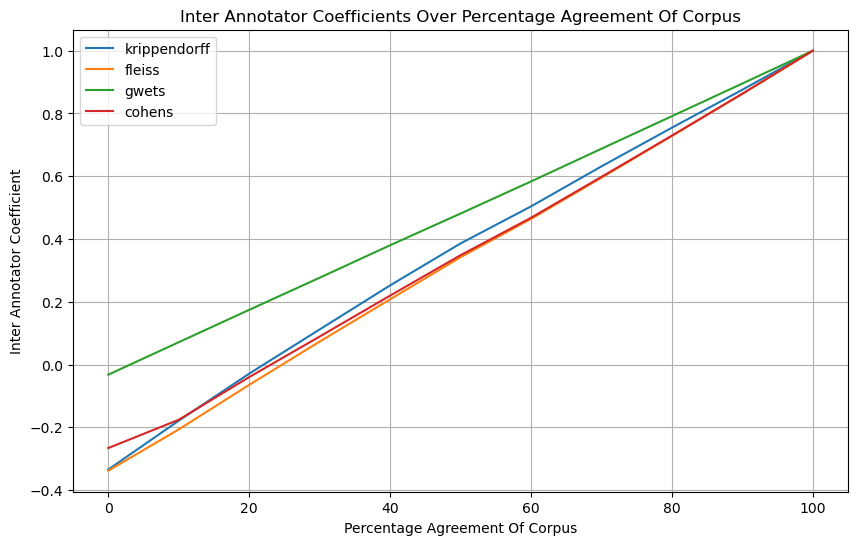

In [4]:
gr.plot_agreement_coefficients(coefficients_0_to_1, title='Inter Annotator Coefficients Over Percentage Agreement Of Corpus', x_axis_title='Percentage Agreement Of Corpus', y_axis_title='Inter Annotator Coefficient')